In [1]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
val_path="Dataset/validation"
train_path="Dataset/train"

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_path,
                                                               seed=2509,
                                                               image_size=(224, 224),
                                                              batch_size=32)
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(val_path,
                                                              seed=2509,
                                                              image_size=(224, 224),
                                                              shuffle=False,
                                                              batch_size=32)

Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


In [3]:
class_names = train_dataset.class_names
print(len(class_names))

36


In [4]:
def create_yolo_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization()) 
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(len(class_names),activation='softmax'))
    return model

In [5]:
model=create_yolo_model()
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                        

In [6]:
history = model.fit(x=train_dataset,
                    epochs= 20,
                    validation_data=val_dataset)

Epoch 1/20
98/98 [==============================] - 171s 2s/step - loss: 3.1209 - accuracy: 0.1663 - val_loss: 2.6225 - val_accuracy: 0.2450
Epoch 2/20
98/98 [==============================] - 176s 2s/step - loss: 2.2637 - accuracy: 0.3339 - val_loss: 1.6449 - val_accuracy: 0.5442
Epoch 3/20
98/98 [==============================] - 174s 2s/step - loss: 1.9227 - accuracy: 0.4305 - val_loss: 1.6033 - val_accuracy: 0.5071
Epoch 4/20
98/98 [==============================] - 175s 2s/step - loss: 1.6420 - accuracy: 0.5040 - val_loss: 0.9049 - val_accuracy: 0.7521
Epoch 5/20
98/98 [==============================] - 175s 2s/step - loss: 1.4496 - accuracy: 0.5499 - val_loss: 0.9399 - val_accuracy: 0.7407
Epoch 6/20
98/98 [==============================] - 177s 2s/step - loss: 1.2328 - accuracy: 0.6218 - val_loss: 0.7893 - val_accuracy: 0.7692
Epoch 7/20
98/98 [==============================] - 178s 2s/step - loss: 1.0739 - accuracy: 0.6709 - val_loss: 0.6997 - val_accuracy: 0.7863
Epoch 8/20
98

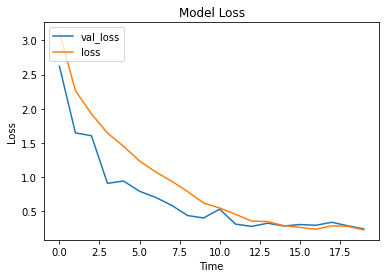

In [7]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel('Time')
plt.legend(['val_loss', 'loss'], loc='upper left')
plt.show()

In [1]:
from keras_preprocessing import image
image_path="tomato.jpeg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
# print("Actual: ")
print("Predicted: "+class_names[np.argmax(pred)])

NameError: name 'plt' is not defined

In [14]:
model.save("mo.h5")

In [17]:
if